# Student Performance Visuals
This notebook contains visualizations for analyzing student performance data.

In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Load data
file_path = 'Student_performance_data _.csv'
data = pd.read_csv(file_path)

## Altair Scatter Plot & GPA Distribution

In [10]:
# Altair scatter plot
alt_chart = alt.Chart(data).mark_circle(size=60).encode(
    x=alt.X('StudyTimeWeekly', title='Weekly Study Time (hours)'),
    y=alt.Y('GPA', title='GPA'),
    color=alt.Color('Tutoring:N', title='Tutoring (0: No, 1: Yes)'),
    tooltip=['StudentID', 'StudyTimeWeekly', 'GPA', 'Tutoring']
).properties(
    title='Interactive Scatter Plot: Study Time vs. GPA',
    width = 320
).interactive()
alt_chart.save('altair_scatter.html')
alt_chart

alt.Chart(...)

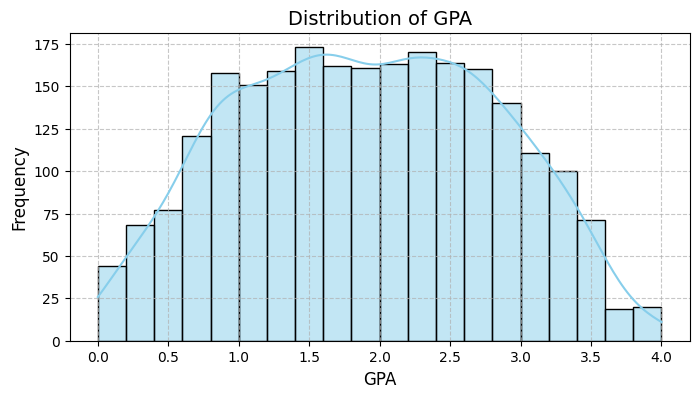

In [3]:
# Seaborn histogram
plt.figure(figsize=(8, 4))
sns.histplot(data['GPA'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of GPA', fontsize=14)
plt.xlabel('GPA', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('gpa_distribution.png')
plt.show()

## Correlation Heatmap

In [4]:
corr_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
corr_matrix = data[corr_columns].corr()

fig_heatmap = px.imshow(corr_matrix,
                        text_auto=True,
                        title="Correlation Heatmap of Key Continuous Variables",
                        labels={"color": "Correlation"})
fig_heatmap.write_html('heatmap.html')
fig_heatmap.show()

## Parallel Coordinates Plot

In [5]:
fig_parallel = px.parallel_coordinates(
    data,
    dimensions=['Age', 'StudyTimeWeekly', 'Absences', 'GPA'],
    color='GPA',
    color_continuous_scale=["#1f77b4", "#FFD700", "#d62728"],
    title="Parallel Coordinates Plot: Exploring Student Performance Factors"
)
fig_parallel.write_image('parallel_coordinates.png')
fig_parallel.show()

## Sankey Diagram - Parental Education → Tutoring → Grade Class

In [6]:
data['GradeClass'] = data['GradeClass'].astype(int)
parental_edu_unique = sorted(data['ParentalEducation'].unique())
parental_nodes = [f"ParentalEdu {int(x)}" for x in parental_edu_unique]
tutoring_nodes = ["Tutoring: No", "Tutoring: Yes"]
grade_classes_unique = sorted(data['GradeClass'].unique())
grade_nodes = [f"GradeClass {int(x)}" for x in grade_classes_unique]
nodes = parental_nodes + tutoring_nodes + grade_nodes
node_index = {label: i for i, label in enumerate(nodes)}

links_1 = data.groupby(['ParentalEducation', 'Tutoring']).size().reset_index(name='count')
source_list = []
target_list = []
value_list = []
for _, row in links_1.iterrows():
    source_list.append(node_index[f"ParentalEdu {int(row['ParentalEducation'])}"])
    target_list.append(node_index["Tutoring: Yes" if row['Tutoring'] == 1 else "Tutoring: No"])
    value_list.append(row['count'])

links_2 = data.groupby(['Tutoring', 'GradeClass']).size().reset_index(name='count')
for _, row in links_2.iterrows():
    source_list.append(node_index["Tutoring: Yes" if row['Tutoring'] == 1 else "Tutoring: No"])
    target_list.append(node_index[f"GradeClass {int(row['GradeClass'])}"])
    value_list.append(row['count'])

sankey_data = go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=nodes,
              color=["lightblue"]*len(parental_nodes) + ["lightgreen"]*len(tutoring_nodes) + ["lightcoral"]*len(grade_nodes)),
    link=dict(source=source_list, target=target_list, value=value_list,
              hovertemplate='From %{source.label} to %{target.label}: %{value}<extra></extra>')
)
fig = go.Figure(data=[sankey_data])
fig.update_layout(title_text="Sankey Diagram: Parental Education -> Tutoring -> Grade Class", font_size=10, width=800, height=600)
fig.write_html('sankey.html')
fig.show()